In [24]:
# from google.colab import drive
# drive.mount('/content/drive')

In [25]:
# ! pip install pgmpy

In [26]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [27]:
import pandas as pd
import numpy as np

import common

In [28]:
data_set_path = "../temp_sets_100/"

# callout

## Data Process

### Read samples

In [29]:
callout_df = common.read_csv_no_rowid(data_set_path+"callout.csv")

In [30]:
callout_df.head()

,subject_id,hadm_id,submit_wardid,submit_careunit,curr_wardid,curr_careunit,callout_wardid,callout_service,request_tele,request_resp,...,callout_status,callout_outcome,discharge_wardid,acknowledge_status,createtime,updatetime,acknowledgetime,outcometime,firstreservationtime,currentreservationtime
0,44346,140114,14,NaN,49,TSICU,1,TRAUM,1,0,...,Inactive,Discharged,49.0,Acknowledged,2165-04-14 10:41:52,2165-04-14 10:41:52,2165-04-14 10:48:42,2165-04-14 11:10:08,NaN,NaN
1,44346,140114,14,NaN,40,TSICU,40,TRAUM,1,0,...,Inactive,Discharged,40.0,Acknowledged,2165-04-15 09:42:22,2165-04-15 09:42:22,2165-04-15 09:45:06,2165-04-15 13:55:09,2165-04-15 10:10:09,NaN
2,42124,158677,14,NaN,40,TSICU,33,TRAUM,1,0,...,Inactive,Discharged,40.0,Acknowledged,2170-05-15 16:37:56,2170-05-15 16:55:00,2170-05-15 16:55:02,2170-05-15 21:40:26,2170-05-15 20:55:26,NaN
3,18123,114383,50,NaN,45,MICU,1,CCU,0,0,...,Inactive,Discharged,45.0,Acknowledged,2199-07-18 07:58:21,2199-07-18 07:58:21,2199-07-18 08:27:56,2199-07-18 22:10:04,NaN,NaN
4,18123,196551,50,NaN,45,MICU,1,MED,1,0,...,Inactive,Discharged,45.0,Acknowledged,2199-12-08 07:10:58,2199-12-08 07:10:58,2199-12-08 07:22:23,2199-12-08 13:10:04,NaN,NaN


### Data preproces

In [31]:
# Drop useless colums
callout_df.drop(['submit_careunit', 'firstreservationtime', 'currentreservationtime'], axis=1, inplace=True)

#### Deal with null values

In [32]:
# Check null value in table
common.nan_count(callout_df)

Total columns: 20
Total rows: 88
--------------
subject_id            0
hadm_id               0
submit_wardid         0
curr_wardid           0
curr_careunit         0
callout_wardid        0
callout_service       0
request_tele          0
request_resp          0
request_cdiff         0
request_mrsa          0
request_vre           0
callout_status        0
callout_outcome       0
discharge_wardid      8
acknowledge_status    0
createtime            0
updatetime            0
acknowledgetime       3
outcometime           0
dtype: int64


#### Set the column types

In [33]:
callout_df.dtypes

subject_id              int64
hadm_id                 int64
submit_wardid           int64
curr_wardid             int64
curr_careunit          object
callout_wardid          int64
callout_service        object
request_tele            int64
request_resp            int64
request_cdiff           int64
request_mrsa            int64
request_vre             int64
callout_status         object
callout_outcome        object
discharge_wardid      float64
acknowledge_status     object
createtime             object
updatetime             object
acknowledgetime        object
outcometime            object
dtype: object

In [34]:
# Transfer some date type
callout_df['createtime'] = pd.to_datetime(callout_df['createtime'])
callout_df['updatetime'] = pd.to_datetime(callout_df['updatetime'])
callout_df['acknowledgetime'] = pd.to_datetime(callout_df['acknowledgetime'])
callout_df['outcometime'] = pd.to_datetime(callout_df['outcometime'])

In [35]:
callout_df.dtypes

subject_id                     int64
hadm_id                        int64
submit_wardid                  int64
curr_wardid                    int64
curr_careunit                 object
callout_wardid                 int64
callout_service               object
request_tele                   int64
request_resp                   int64
request_cdiff                  int64
request_mrsa                   int64
request_vre                    int64
callout_status                object
callout_outcome               object
discharge_wardid             float64
acknowledge_status            object
createtime            datetime64[ns]
updatetime            datetime64[ns]
acknowledgetime       datetime64[ns]
outcometime           datetime64[ns]
dtype: object

#### Process time data

In [36]:
admissions_df = common.read_csv_no_rowid(data_set_path+"admissions.csv")

In [37]:
admittime_df = admissions_df.loc[:, ['hadm_id', 'admittime']]
admittime_df['admittime'] = pd.to_datetime(admittime_df['admittime'])

In [38]:
callout_mid_df = pd.merge(left=callout_df, right=admittime_df, how='left', on=['hadm_id'])

In [39]:
callout_mid_df['outcometime'] = callout_mid_df.apply(common.time_process, args=('acknowledgetime', 'outcometime', 'updatetime'), axis=1)
callout_mid_df['acknowledgetime'] = callout_mid_df.apply(common.time_process, args=('updatetime', 'acknowledgetime'), axis=1)
callout_mid_df['updatetime'] = callout_mid_df.apply(common.time_process, args=('createtime', 'updatetime'), axis=1)
callout_mid_df['createtime'] = callout_mid_df.apply(common.time_process, args=('admittime', 'createtime'), axis=1)

In [40]:
callout_df = callout_mid_df.drop(['hadm_id', 'admittime', 'subject_id'], axis=1)

In [41]:
callout_df.head(30)

,submit_wardid,curr_wardid,curr_careunit,callout_wardid,callout_service,request_tele,request_resp,request_cdiff,request_mrsa,request_vre,callout_status,callout_outcome,discharge_wardid,acknowledge_status,createtime,updatetime,acknowledgetime,outcometime
0,14,49,TSICU,1,TRAUM,1,0,0,0,0,Inactive,Discharged,49.0,Acknowledged,893812.0,0.0,410.0,1286.0
1,14,40,TSICU,40,TRAUM,1,0,0,0,0,Inactive,Discharged,40.0,Acknowledged,976642.0,0.0,164.0,15003.0
2,14,40,TSICU,33,TRAUM,1,0,0,0,0,Inactive,Discharged,40.0,Acknowledged,317096.0,1024.0,2.0,17124.0
3,50,45,MICU,1,CCU,0,0,0,0,0,Inactive,Discharged,45.0,Acknowledged,1176141.0,0.0,1775.0,49328.0
4,50,45,MICU,1,MED,1,0,0,0,0,Inactive,Discharged,45.0,Acknowledged,229798.0,0.0,685.0,20861.0
5,52,24,MICU,1,OMED,0,0,0,0,0,Inactive,Discharged,24.0,Acknowledged,96090.0,82817.0,1620.0,41535.0
6,52,18,MICU,1,OMED,1,0,0,0,0,Inactive,Discharged,18.0,Acknowledged,75738.0,0.0,2338.0,20986.0
7,33,3,SICU,3,NSURG,0,0,0,0,0,Inactive,Discharged,3.0,Acknowledged,327953.0,0.0,240.0,22570.0
8,52,18,MICU,1,MED,0,0,0,0,0,Inactive,Discharged,18.0,Acknowledged,66680.0,0.0,990.0,21134.0
9,7,17,CCU,17,CCU,1,0,0,0,0,Inactive,Discharged,17.0,Acknowledged,54574.0,0.0,147.0,41181.0


---

##  Build Network

In [42]:
callout_df.columns

Index(['submit_wardid', 'curr_wardid', 'curr_careunit', 'callout_wardid',
       'callout_service', 'request_tele', 'request_resp', 'request_cdiff',
       'request_mrsa', 'request_vre', 'callout_status', 'callout_outcome',
       'discharge_wardid', 'acknowledge_status', 'createtime', 'updatetime',
       'acknowledgetime', 'outcometime'],
      dtype='object')

### Set constraint

In [43]:
# def time_is_valid(column_names, data):
#     update_create = ((data['updatetime'] - data['createtime']).apply(lambda x: 0 <= x.days  <= 2))

#     # acknowledge_update = \
#     #     (pd.isna(data['acknowledgetime'])) | \
#     #     (((pd.isna(data['acknowledgetime']) == False) & ((data['acknowledgetime'] - data['updatetime']).apply(lambda x: -1 <= x.days  <= 1))))

#     # outcome_create = \
#     #     (pd.isna(data['acknowledgetime']) & (callout_df['outcometime'] - callout_df['createtime']).apply(lambda x: 0 <= x.days <= 2)) | \
#     #     ( \
#     #         (pd.isna(data['acknowledgetime']) == False) & ((data['outcometime'] - data['acknowledgetime']).apply(lambda x: 0 <= x.days  <= 2)) \
#     #     )
        
#     return update_create# & acknowledge_update & outcome_create

In [44]:
# def time_trasform(column_names, data):
#     data['outcometime'] = data['outcometime'].astype(int) - data['acknowledgetime'].astype(int)
#     data['acknowledgetime'] = data['acknowledgetime'].astype(int) - data['updatetime'].astype(int)
#     data['updatetime'] = data['updatetime'].astype(int) - data['createtime'].astype(int)

#     return data

# def time_reverse_transform(column_names, transformed_data):
#     transformed_data['updatetime'] = transformed_data['updatetime'] + transformed_data['createtime']
#     transformed_data['acknowledgetime'] = transformed_data['acknowledgetime'] + transformed_data['updatetime']
#     transformed_data['outcometime'] = transformed_data['outcometime'] + transformed_data['acknowledgetime']

#     # print(transformed_data.head())
#     return transformed_data

In [45]:
# TimeProcess = create_custom_constraint(
#     is_valid_fn=time_is_valid,
#     transform_fn=time_trasform,
#     reverse_transform_fn=time_reverse_transform
# )

# time_constraint = TimeProcess(
#     column_names=['createtime', 'updatetime','acknowledgetime', 'outcometime']
# )

In [46]:
constraints = []

### Build and train model

In [47]:
train_data = callout_df
best_model = common.build_model(constraints=constraints, train_data=train_data)

Strat training ...
Tabular Preset
Gaussian Copula
CTGAN
CopulaGAN
TVAE
Training finished!
Strat evaluating ...
Evaluating finished!
The best_model is ctgan, evaluation score is 0.5797957978996993


In [48]:
model_save_path = data_set_path + "100_models/" + "callout_model.pkl"
common.save_model(best_model, model_save_path)

---

## Evaluate data

In [49]:
from sdv.evaluation import evaluate

### Load model and generate sample

In [50]:
date_load_path = data_set_path + "100_models/" + "callout_model.pkl"
model = common.load_model(date_load_path)

In [51]:
sample = model.sample(num_rows=len(train_data))

### Evaluation

In [52]:
evaluate(sample, train_data, metrics=['ContinuousKLDivergence'])

0.4743105381213928

In [53]:
evaluate(sample, train_data, metrics=['DiscreteKLDivergence'])

0.7778648008623462

In [54]:
evaluate(sample, train_data)

0.5115466388365237

In [55]:
sample['curr_careunit'].value_counts()

MICU     37
TSICU    19
SICU     16
CCU      12
CSRU      4
Name: curr_careunit, dtype: int64

<AxesSubplot:>

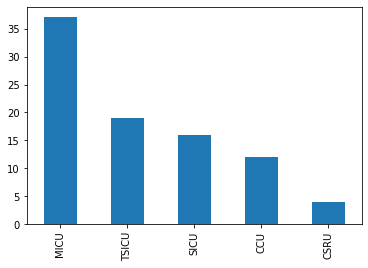

In [56]:
sample['curr_careunit'].value_counts().plot.bar()

In [57]:
train_data['curr_careunit'].value_counts()

MICU     43
SICU     17
TSICU    12
CCU      11
CSRU      5
Name: curr_careunit, dtype: int64

<AxesSubplot:>

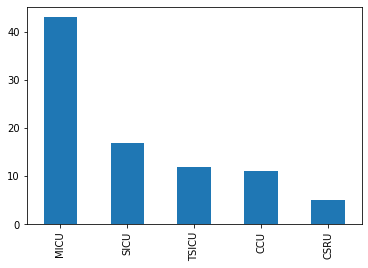

In [58]:
train_data['curr_careunit'].value_counts().plot.bar()